In [3]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow .keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# CLONING THE DATASET FROM THE GITHUB REPOSITORY
!git clone https://github.com/RishitToteja/Chext-X-ray-Images-Data-Set.git


Cloning into 'Chext-X-ray-Images-Data-Set'...
remote: Enumerating objects: 2319, done.
remote: Total 2319 (delta 0), reused 0 (delta 0), pack-reused 2319
Receiving objects: 100% (2319/2319), 1.31 GiB | 29.75 MiB/s, done.
Checking out files: 100% (2296/2296), done.


In [4]:
import os

main_dir = "/content/Chext-X-ray-Images-Data-Set/DataSet/Data"

# SETTING TRAIN AND TEST DIRECTORY
train_dir = os.path.join(main_dir, "train")
test_dir = os.path.join(main_dir, "test")

#SETING DIRECTORY FOR COVID AND NORMAL IMAGES DIRECTORY
train_covid_dir = os.path.join(train_dir, "COVID19")
train_normal_dir = os.path.join(train_dir, "NORMAL")

test_covid_dir = os.path.join(test_dir, "COVID19")
test_normal_dir = os.path.join(test_dir, "NORMAL")


In [8]:
import os

# folder path
dir_path = '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 545


In [5]:
# MAKING SEPERATE FILES : 
train_covid_names = os.listdir(train_covid_dir)
train_normal_names = os.listdir(train_normal_dir)

test_covid_names = os.listdir(test_covid_dir)
test_normal_names = os.listdir(test_normal_dir)

['/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(149).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID-19 (11).jpeg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID-19 (7).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID-19 (191).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID-19 (20).jpeg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(92).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(252).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(245).jpg']
['/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/NORMAL/NORMAL(782).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/NORMAL/NORMAL(1418).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/NORMAL/NORMAL(596).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/NORMAL/NORMAL(144

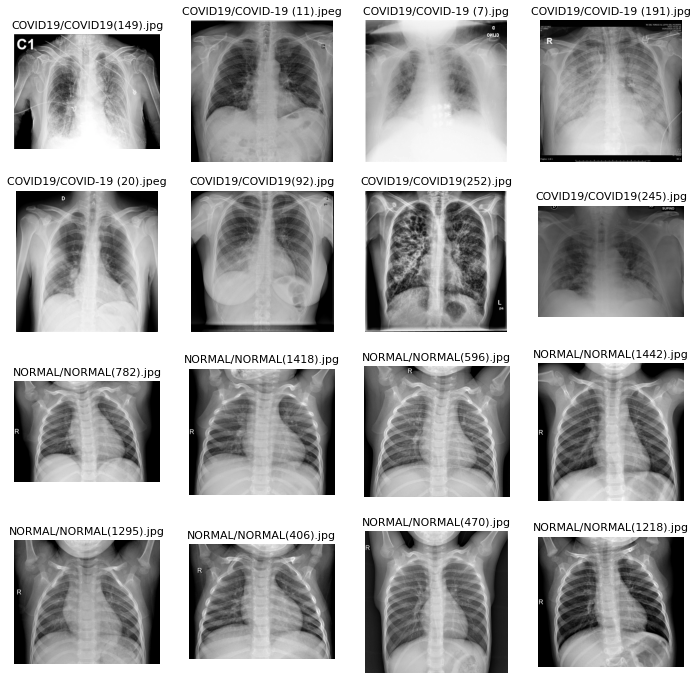

In [ ]:
import matplotlib.image as mpimg

rows = 4
columns = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

covid_img = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_img = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

print(covid_img)
print(normal_img)

merged_img = covid_img + normal_img

for i, img_path in enumerate(merged_img):
  title = img_path.split("/", 6)[6]
  plot = plt.subplot(rows, columns, i+1)
  plot.axis("Off")
  img = mpimg.imread(img_path)
  plot.set_title(title, fontsize = 11)
  plt.imshow(img, cmap= "gray")

plt.show()

In [26]:
# CREATING TRAINING, TESTING AND VALIDATION BATCHES

dgen_train = ImageDataGenerator(
                                # rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2)
                                # horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255,
                                     )

dgen_test = ImageDataGenerator( zoom_range = 0.2
                              )

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (224, 224), 
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size = (224, 224), 
                                                      subset = "validation", 
                                                      batch_size = 32, 
                                                      class_mode = "binary", shuffle=False)
test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size = (224, 224), 
                                               batch_size = 32, 
                                               class_mode = "binary", shuffle=False)




Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
print("Class Labels are: ", train_generator.class_indices)
print("Image shape is : ", train_generator.image_shape)

Class Labels are:  {'COVID19': 0, 'NORMAL': 1}
Image shape is :  (224, 224, 3)


In [11]:
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Input,Dense, Dropout, Flatten,Activation,GlobalMaxPooling2D
from keras.layers import Conv2D, MaxPooling2D,ZeroPadding2D,BatchNormalization,Convolution2D
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.utils import img_to_array
# from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

model = Sequential()

# 1) CONVOLUTIONAL LAYER - 1
model.add(Conv2D(32, (5,5), padding = "same", activation = "relu", input_shape = (224,224,3)))

# 2) POOLING LAYER - 1
model.add(MaxPooling2D(pool_size=(2,2)))

# 3) DROPOUT LAYER -2
model.add(Dropout(0.5))

# 4) CONVOLUTIONAL LAYER - 2
model.add(Conv2D(64, (5,5), padding = "same", activation = "relu"))

# 5) POOLING LAYER - 2
model.add(MaxPooling2D(pool_size=(2,2)))

# 6) DROPOUT LAYER - 2
model.add(Dropout(0.5))

# 7) FLATTENING LAYER TO 2D SHAPE
model.add(Flatten())

# 8) ADDING A DENSE LAYER
model.add(Dense(256, activation = 'relu'))

# 9 DROPOUT LAYER - 3
model.add(Dropout(0.5))

# 10) FINAL OUTPUT LAYER
model.add(Dense(1, activation = 'sigmoid'))

### PRINTING MODEL SUMMARY
# model.summary()
# device = torch.device("cuda:0")
# model = nn.DataParallel(model).cuda()

# model = model.cuda()
with tf.device("/GPU:0"):
    gpu_model = tf.keras.models.clone_model(model)

In [12]:
# COMPILING THE MODEL

model.compile(Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
# TRAINING THE MODEL
history = model.fit(train_generator, 
                    epochs = 40, 
                    validation_data = validation_generator)

Epoch 1/40
46/46 [==============================] - 70s 1s/step - loss: 1.5947 - accuracy: 0.7605 - val_loss: 0.5312 - val_accuracy: 0.7680
Epoch 2/40
46/46 [==============================] - 57s 1s/step - loss: 0.2723 - accuracy: 0.8979 - val_loss: 0.4423 - val_accuracy: 0.8370
Epoch 3/40
46/46 [==============================] - 58s 1s/step - loss: 0.2169 - accuracy: 0.9179 - val_loss: 0.2092 - val_accuracy: 0.9503
Epoch 4/40
46/46 [==============================] - 59s 1s/step - loss: 0.1884 - accuracy: 0.9400 - val_loss: 0.4247 - val_accuracy: 0.8840
Epoch 5/40
46/46 [==============================] - 57s 1s/step - loss: 0.1755 - accuracy: 0.9372 - val_loss: 0.1935 - val_accuracy: 0.9365
Epoch 6/40
46/46 [==============================] - 58s 1s/step - loss: 0.1487 - accuracy: 0.9482 - val_loss: 0.1582 - val_accuracy: 0.9282
Epoch 7/40
46/46 [==============================] - 58s 1s/step - loss: 0.1615 - accuracy: 0.9503 - val_loss: 0.3646 - val_accuracy: 0.8812
Epoch 8/40
46/46 [==

In [ ]:
print(history.history['loss'])

[1.610272765159607, 0.23735752701759338, 0.17946398258209229, 0.20711112022399902, 0.18325592577457428, 0.16954846680164337, 0.1540401130914688, 0.15502911806106567, 0.15109461545944214, 0.15873880684375763, 0.12612055242061615, 0.13844498991966248, 0.12227925658226013, 0.12284264713525772, 0.11538112908601761, 0.1154535561800003, 0.13029497861862183, 0.1322173923254013, 0.14267899096012115, 0.10545235127210617, 0.09602320194244385, 0.09839103370904922, 0.09862590581178665, 0.10403560101985931, 0.1026250422000885, 0.10413947701454163, 0.10695918649435043, 0.08463916182518005, 0.08971163630485535, 0.07624121755361557]


Text(0.5, 0, 'epoch')

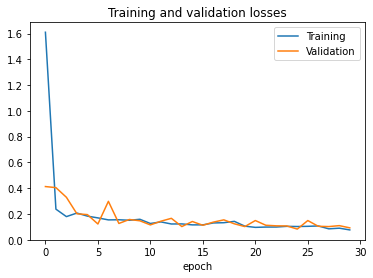

In [ ]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')

In [ ]:
print(history.history['val_accuracy'])

[0.8977900743484497, 0.950276255607605, 0.9558011293411255, 0.9337016344070435, 0.9419889450073242, 0.9558011293411255, 0.9171270728111267, 0.9530386924743652, 0.9447513818740845, 0.9640883803367615, 0.969613254070282, 0.9558011293411255, 0.9475138187408447, 0.9640883803367615, 0.9475138187408447, 0.9640883803367615, 0.950276255607605, 0.9475138187408447, 0.958563506603241, 0.9613259434700012, 0.9475138187408447, 0.9558011293411255, 0.958563506603241, 0.9530386924743652, 0.969613254070282, 0.9447513818740845, 0.9558011293411255, 0.9558011293411255, 0.9668508172035217, 0.969613254070282]


In [ ]:
p

Text(0.5, 0, 'epoch')

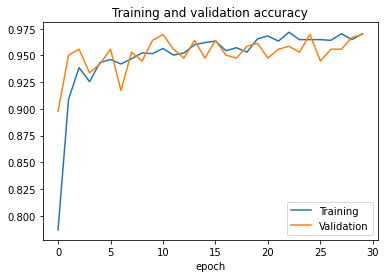

In [ ]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

In [ ]:
prob_test = model.predict_generator(generator=test_generator)
prob_val = model.predict_generator(generator=validation_generator)

In [30]:
y_pred_t = prob_test >= 0.5
y_pred_v = prob_val >= 0.5

In [ ]:
y_t=[]
for i in test_generator.classes:
  if i ==1:
    y_t.append(True)
  else:
    y_t.append(False)  

In [23]:
y_val=[]
for i in validation_generator.classes:
  if i ==0:
    y_val.append(False)
  else:
    y_val.append(True)  

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_t, y_pred_t))
print('Classification Report')
target_names = ['Covid-19', 'Normal']
print(classification_report(y_t, y_pred_t, target_names=target_names))


[[161   6]
 [  5 312]]
Classification Report
              precision    recall  f1-score   support

    Covid-19       0.97      0.96      0.97       167
      Normal       0.98      0.98      0.98       317

    accuracy                           0.98       484
   macro avg       0.98      0.97      0.97       484
weighted avg       0.98      0.98      0.98       484



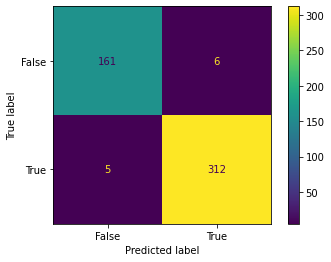

In [33]:
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_t, y_pred_t), display_labels = [False, True])

cm_display.plot()
plt.show()

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_val_v, y_pred_v))
print('Classification Report')
target_names = ['Covid-19', 'Normal']
print(classification_report(y_val_v, y_pred_v, target_names=target_names))


[[  6 247]
 [108   1]]
Classification Report
              precision    recall  f1-score   support

    Covid-19       0.05      0.02      0.03       253
      Normal       0.00      0.01      0.01       109

    accuracy                           0.02       362
   macro avg       0.03      0.02      0.02       362
weighted avg       0.04      0.02      0.02       362



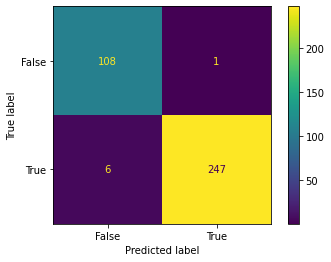

In [24]:
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_val_v, y_pred_v), display_labels = [False, True])

cm_display.plot()
plt.show()